In [24]:
import csv
from collections import defaultdict
import ast
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches 
import textwrap 
import matplotlib.font_manager as fm
import pandas as pd


In [14]:
keyword_groups={
'Natural Language Processing': ['Machine translation', 'Question answering (information retrieval)', 'Speech processing', 'Fake news','Grammar', 'Text detection', 'Thesauri', 'Tokenization', 'Teleconferencing', 'US Department of Homeland SecurityVocabulary', 'Dictionaries', 'Decision making', 'Decoding', 'Error analysis', 'Encoding', 'Knowledge based systems', 'Knowledge discovery', 'Knowledge engineering', 'Knowledge transfer', 'Labeling', 'Learning (artificial intelligence)', 'Learning systems', 'Text-to-image synthesis', 'Natural language processing', 'Natural languages', 'Linguistics', 'Message passing', 'Inference algorithms', 'Markov processes', 'Markov random fields', 'Mixture models', 'Pragmatics', 'Prediction algorithms', 'Predictive models', 'Probabilistic logic', 'Semantics', 'Search problems', 'Sequential analysis', 'Supervised learning', 'Vocabulary', 'Text recognition', 'Syntactics', 'Taxonomy', 'Character recognition', 'Context-aware services', 'Handwriting recognition', 'Optical character recognition software', 'Phonetics', 'Speech enhancement', 'Speech recognition', 'Twitter', 'Voice activity detection', 'Annotations', 'Semantic search', 'Sentiment analysis', 'Text analysis', 'Text categorization', 'Writing', 'Information filters', 'Prediction methods', 'Electronic mail', 'Web and internet services', 'Web and internet services', 'Web conferencing', 'Webcams', 'Hypertext systems', 'Unified modeling language', 'User-generated content', 'Webcams', 'Browsers', 'Open Access', 'Resource description framework', 'QR codes', 'Query processing', 'Virtual assistants', 'Speech coding', 'Vocoders', 'Large language models', 'Text summarization', 'Text to image', 'Text to speech', 'Text to video', 'Recommender systems', 'Formal languages'], 

'Medical Imaging and Healthcare': ['Auditory system', 'Dentistry', 'Embryo', 'DNA', 'Body regions', 'Heart', 'Human activity recognition', 'Medical imaging', 'Biomedical imaging', 'Computed tomography', 'Cancer', 'Biomedical optical imaging', 'Disease diagnosis', 'Blood vessels', 'Bones', 'Diseases', 'Biomedical imaging', 'Disease diagnosis', 'X-ray imaging', 'Medical diagnostic imaging', 'Magnetic resonance imaging', 'Lesions', 'Liver', 'Positron emission tomography', 'Pancreas', 'Pathology', 'Retina', 'Medical diagnostic imaging', 'Genomics', 'Mel frequency cepstral coefficient', 'Optical imaging', 'Optical filters', 'Optical propagation', 'Optical scattering', 'Picture archiving and communication systems', 'Prognostics and health management', 'Assisted living', 'Biomedical monitoring', 'Biopsy', 'Calcium', 'Heart rate', 'Hospitals', 'Plethysmography', 'Phantoms', 'Thorax', 'Teeth', 'Veins', 'X-rays', 'Blindness', 'Autism', 'Axons', 'Colonoscopy', 'Diabetic retinopathy', 'Functional magnetic resonance imaging', 'Gait recognition', 'Lung', 'Lung cancer', 'Medical diagnosis', 'Neurological diseases', 'Pneumonia', 'Surgery', 'Telemedicine', 'Visual impairment', 'Heart beat', 'Hemorrhaging', 'Pediatrics', 'Radiometry', 'X-ray scattering', 'Microscopy', 'Neural activity', 'Neuroscience', 'Fingerprint recognition', 'Face detection', 'Iris recognition', 'COVID-19', 'Histopathology', 'Melanoma', 'Medical services', 'Myocardium', 'Radiography', 'Retinopathy', 'Toxicology', 'Wounds', 'Iris', 'MIMICs', 'Photothermal effects', 'Temperature distribution', 'Thermal analysis', 'Thermal lensing', 'Thermal stresses', 'Angiography', 'Biology', 'Cells (biology)', 'Medical conditions', 'Minimally invasive surgery', 'Photoplethysmography', 'Physiology', 'Radiology', 'Retinal vessels', 'Scanning electron microscopy', 'Fluorescence', 'Ultrasonic imaging', 'Breast cancer', 'Mammography', 'Biomechanics', 'Biomedical measurement', 'Infrared imaging', 'Medical treatment', 'Microwave imaging', 'Neuroimaging', 'Stroke (medical condition)', 'Aneurysm', 'Arteries', 'Biomarkers', 'Breast', 'Colon', 'Immune system', 'Lymph nodes', 'Mammography', 'Metastasis', 'Microwave imaging', 'Neuroimaging', 'Tumors', 'Endoscopes', 'Breast cancer', 'Biomedical measurement', 'Diabetes', 'Diagnostic radiography', 'Echocardiography', 'Medical treatment', 'Neuroimaging', 'Stroke (medical condition)', 'Magnetic resonance', 'Atrophy', 'Biological tissues', 'Organ transplantation', 'Anatomical structure', 'Spinal cord', 'Optical coherence tomography', 'Protein engineering', 'Speech codecs', 'Tongue', 'Temperature sensors', 'Membrane potentials', 'In vivo', 'Optical diffraction', 'Acoustic distortion', 'Multimodal sensors', 'Microphone arrays', 'Temperature', 'Transmission electron microscopy', 'Cancer treatment', 'Clinical diagnosis', 'Implants', 'Liver cancer', 'Stem cells', 'Soma', 'Protein sequence', 'Enzymes', 'Field-flow fractionation', 'Arrhythmia', 'Gallbladder', 'Liver diseases', "Parkinson's disease", 'Phenotypes', 'Point of care', 'Pulmonary diseases', 'Sleep apnea', 'Scalp', 'Shoulder', 'Cornea', 'Mitochondria', 'Alzheimer\'s disease','Biomembranes', 'Dermatology', 'Cardiac disease', 'Electrical impedance tomography', 'Glaucoma', 
        'Medical devices', 'Neural microtechnology', 'Neural pathways', 'Cloning', 'Amino acids', 'Symbiosis', 'Drugs', 'Pulse measurements', 'Tomography', 'Morphology',  'Mice', 'Genetics', 'Pandemics', 'Proteins', 'Neuromorphics', 'Lung', 'Telemedicine', 'Neural circuits', 'Neural implants', 
        'Pancreatic cancer', 'Neuromorphic engineering', 'RNA', 'Genetic expression', 'Pneumonia', 'Glands',  'Bioinformatics', 'Biological neural networks', 'Biological system modeling'], 

'Autonomous Vehicles and Robotics': ['Mobile robots', 'Pedestrians', 'Road accidents', 'Telescopes', 'Reflection', 'Reverse engineering', 'Satellite broadcasting', 'Space heating', 'Light sources', 'Lighting', 'Logistics', 'Logic gates', 'Manganese', 'Manuals', 'Nickel',
        'Electroencephalography', 'Electron tubes', 'Explosives', 'Earth Observing System', 'Multi-party computation', 'Multimedia systems', 'Quality function deployment', 'Multitasking', 'Observers', 'Orifices',  'Patents', 'Performance analysis',  'Excavation', 'Extraterrestrial phenomena', 'Fatigue', 'Fault detection', 
        'Facsimile', 'Focusing', 'Forecasting', 'Glass', 'Gold', 'Graphite',   'Productivity','Rigidity', 'Exploration', 'Innovations', 'Gravity', 'Electronic publishing',  'Media',  'Two-dimensional displays',  'Comets', 'High-temperature superconductors', 'Space vehicles', 'Temperature measurement', 'Velocity measurement',
        'Markov decision processes',  'Road accidents', 'Vehicular ad hoc networks', 'Computational efficiency', 'Computer architecture',  'Road safety',  'System performance', 'Materials science and technology', 'Production systems', 'Lead acid batteries',  'Deformation',  'Filters', 'Watches', 'ISO',  'Ink', 'Ions', 'Iron', 'Jitter', 'Lattices', 'Physics', 'Planning', 'Reliability', 'Robustness',  'Standards', 'Standardization',
        'Schedules', 'Strain', 'Spirals','Switches', 'Synchronization', 'End effectors', 'Mobile handsets',  'Mobile applications', 'Feeds', 'Feedback loop', 'Grippers', 'Tensile stress', 'Time factors', 'Time measurement','Tuning', 'Headphones', 'Fault tolerant systems',
        'Wiring', 'Xenon', 'Zinc', 'Zirconium', 'Optical fiber networks', 'Games', 'US Department of Defense', 'US Department of Transportation',  'Optical network units', 'Smart phones', 'Solid modeling', 'Trajectory',
        'Sensor systems', 'Thermal sensors', 'Motion measurement', 'Multisensory integration', 'Infrared detectors', 'Infrared heating', 'Radio access technologies', 'Transient response', 'Torque', 'Brushes', 'Cavity resonators', 'Coils', 'Computer crashes', 'DH-HEMTs', 'Nuclear measurements', 'Nuclear power generation',  'Maintenance', 'Memory', 'Metalearning', 'Metals', 'Motion detection', 'Ducts', 'Electric shock', 'Radio astronomy', 'Fault diagnosis','Erbium', 'Space exploration', 'Stimulated emission', 'Ganglia', 'ISO Standards', 'Laboratories', 'Material properties', 'Matrices', 'Mercury (metals)', 'Multigrid methods', 'Fault tolerance', 'Radio interferometry', 'Accuracy', 'Aerodynamics', 'NASA', 'Space communications', 'Dynamic scheduling', 'Dynamics', 'Azimuth', 'Bars', 'Best practices', 'Calibration', 'Cameras', 'Cams', 'Controllability', 'Bidirectional control', 'Bicycles', 'Binary codes', 'Heating systems', 'Gyroscopes', 'Hafnium', 'Glass box', 'Fuses', 'Gallium nitride', 'Solids',  'Open area test sites', 'Wind turbines', 'Offshore installations', 'Scheduling algorithms', 'Information integrity', 'Long short term memory','Optical fibers','Circuit faults','Neural network hardware','Digital simulation','Radar applications','Mechatronics','Cooperative systems', 'Autonomous aerial vehicles', 'Human-robot interaction', 'Vehicle detection', 'Autonomous driving', 'Autonomous automobiles', 'Autonomous vehicles', 'Robotics', 'Automation', 'Aerospace electronics', 'Path planning', 'SLAM', 'Collision avoidance', 'Navigation', 'UAVs', 'Drone vision', 'Aerial vehicle navigation', 'Remote inspections', 'Swarm intelligence', 'Autonomous systems', 'Global Positioning System', 'Wireless sensor networks', 'Automobiles', 'Autonomous vehicles', 'Robotics', 'Path planning', 'Navigation', 'UAVs', 'Drone vision', 'Aerial vehicle navigation', 'Engines', 'Humanoid robots', 'Marine vehicles', 'Legged locomotion', 'Manipulators', 'Robot sensing systems', 'Robot vision systems', 'Robots', 'Simultaneous localization and mapping', 'Motion compensation', 'Motion estimation', 'Object detection', 'Object recognition', 'Object segmentation', 'Object tracking', 'Robot vision systems', 'Unmanned aerial vehicles', 'Vehicle dynamics', 'Vehicles', 'Visual odometry', 'Visual perception', 'Visual systems', 'Autonomous robots', 'Drones', 'Helicopters', 'Motorcycles', 'Servosystems', 'Aircraft', 'Boats', 'Lane detection', 'Propulsion', 'Robot kinematics', 'Service robots', 'Trajectory planning', 'Machine vision', 'Sensor fusion', 'Traffic control', 'Indoor navigation', 'Wearable computers', 'Airplanes', 'Coordinate measuring machines', 'Rotation measurement', 'Machine-to-machine communications', 'Wearable computers', 'Smart cameras', 'Mobile agents', 'Autonomous agents', 'Coordinate measuring machines', 'Proportional control', 'Tracking loops', 'Relays', 'Tracking loops', 'Relays', 'Inertial navigation', 'Inertial sensors', 'Robot motion', 'Robotic assembly', 'Social robots', 'System identification', 'PI control', '6-DOF', 'Accelerometers', 'Active perception', 'Odometry', 'Vehicle routing', 'Robot learning', 'MIMO radar', 'Vibration measurement', 'Assistive robots', 'Intelligent vehicles', 'Manipulator dynamics', 'Motion planning', 'Propioception', 'Global navigation satellite system', 'Smart cities', 'Intelligent agents','Space stations', 'Autonomous Vehicles and Robotics', 'Robot control'], 

'Human-Centric Vision': ['Aging', 'Anthropometry', 'Head-mounted displays', 'Palmprint recognition', 'Footwear',
        'Thumb','Usability', 'Foot', 'Photography', 'Rhythm', 'Accelerated aging', 'Clothing', 'Affordances', 'Forehead', 'Pain', 'Human computer interaction', 'Human in the loop', 'Oral communication', 'Sign language', 'Activity recognition', 'Human pose estimation', 'Gesture recognition', 'Facial recognition', 'Emotion analysis', 'Gait analysis', 'Cognition', 'Assistive technology', 'Creativity', 'Behavioral sciences', 'Eyelids', 'Fingers', 'User experience', 'User interfaces', 'Emotion recognition', 'Gesture recognition', 'Facial recognition', 'Cognition', 'Face recognition', 'Facial features', 'Gaze tracking', 'Face', 'Facial recognition', 'Head', 'Lips', 'Mouth', 'Hip', 'Neck', 'Muscles', 'Hippocampus', 'Psychology', 'Hair', 'Microphones', 'Nose', 'Elbow', 'Ear', 'Skin', 'Torso', 'Wrist', 'Face detection', 'Fingerprint recognition', 'Iris recognition', 'Identification of persons', 'Biometrics (access control)', 'Faces', 'Facial animation', 'Human factors', 'Human image synthesis', 'Tactile sensors', 'Force', 'Stress', 'Weight measurement', 'Life estimation', 'Object oriented modeling', 'Brain', 'Cognitive science', 'Life estimation', 'Cognitive processes', 'Mood', 'Problem-solving', 'Problem-solving', 'Brain-computer interfaces', 'Social groups', 'Animal behavior', 'Associative memory', 'Biological systems', 'Affective computing', 'Collective intelligence', 'Cultural differences', 'Weight control', 'Adaptive learning', 'Attention mechanisms', 'Depression', 'Social sciences', 'Public security', 'Intent recognition', 'Biometrics', 'Prevention and mitigation'], 

'Natural Scenes and Environmental Analysis': [ 'Stars','Dark matter', 'Ash', 'Moisture', 'Streams', 'Environmental factors', 'Grasslands', 'Icebergs', 'Lakes', 'Natural Scenes and Environmental Analysis', 
        'Weather forecasting', 'Weather modification','Fluids', 'Water', 'Climate change', 'Flora', 'Flowering plants', 'Geospatial analysis', 'Land surface', 'Phenology', 'Plant diseases', 'Plantations', 'Agriculture', 'Atmospheric measurements', 'Atmospheric modeling', 'Clouds', 'Remote sensing', 'Ocean monitoring', 'Aerial imagery', 'Satellite images', 'Climate analysis', 'Floods', 'Sea surface', 'Agriculture', 'Atmospheric measurements', 'Clouds', 'Ocean monitoring', 'Climate analysis', 'Geophysical measurement techniques', 'Ground penetrating radar', 'Extraterrestrial measurements', 'Meteorology', 'Rain', 'Rivers', 'Snow', 'Roads', 'Public transportation', 'Geophysical measurement techniques', 'Acoustics', 'Animals', 'Birds', 'Clutter', 'Liquids', 'Monitoring', 'Pipelines', 'Powders', 'Photonics', 'Satellites', 'Sensors', 'Sensor arrays', 'Spatial resolution', 'Spatial coherence', 'Vegetation', 'Urban areas', 'Water resources', 'Biodiversity', 'Earth', 'Environmental analysis', 'Geology', 'Natural scenes', 'Sea measurements', 'Vegetation mapping', 'Wildlife', 'Forestry', 'Fungi', 'Methane', 'Rocks', 'Whales', 'Lightning', 'Ecosystems', 'Horses', 'Hurricanes', 'Oceans', 'Plants (biology)', 'Reservoirs', 'Spaceborne radar', 'Irrigation', 'Systematics', 'Earthquakes', 'Oils', 'Density measurement', 'Pollution measurement', 'Rough surfaces', 'Surface roughness', 'Moon', 'Rough surfaces', 'Surface roughness', 'Light scattering', 'Nonhomogeneous media', 'Spectroscopy', 'Spatial diversity', 'Nonhomogeneous media', 'Spectroscopy', 'Spatial diversity', 'Soil', 'Scattering parameters', 'Vibrations', 'Hazards', 'Orbits', 'Impurities', 'Current distribution', 'Arctic', 'Biomes', 'Fish', 'Greenhouse effect', 'Storms', 'Seals', 'Structural engineering', 'Antarctica', 'Rainforests', 'Marine vegetation', 'Habitats', 'Green buildings', 'Precipitation', 'Planets', 'Acoustic field', 'Acoustic noise', 'Lava', 'Area measurement', 'Contamination'], 

'Augmented Reality and Virtual Reality ': ['Digital humans', 'Augmented Reality (AR) and Virtual Reality (VR)', 'Isosurfaces','Blogs', 'Headphones', 'Keyboards', 'Wheels', 'Augmented reality', 'Virtual reality', '3D reconstruction', 'Avatars', 'Holography', 'Immersive environments', '3D reconstruction', 'Immersive environments', 'Graphics', 'Graphics processing units', 'Telepresence', 'Rendering (computer graphics)', 'Virtual reality', '3D reconstruction', 'Immersive environments', 'Three-dimensional displays', 'Two dimensional displays', 'Augmented reality', 'Extended reality', 'Immersive experience', 'Mixed reality', 'Virtual environments', 'Virtual private networks', 'X reality', 'Animation', 'Image motion analysis', 'Optical flow', 'Radar imaging', 'Visual effects', 'Surfaces', 'Liquid crystal displays', 'Image texture', 'Liquid crystal displays', 'Optical microscopy', 'Optical saturation', 'Optical feedback', 'Image texture', 'Image storage', 'Ray tracing', 'Optical reflection', 'Optical feedback', 'Optical design', 'Smart cameras', 'Computer graphics', 'Computer graphics', 'Metaverse', 'Geometric modeling', 'Video codecs', 'Digital cameras', 'Image augmentation', 'Image transformation', 'Artificial light', 'Image morphing', 'Neural radiance field', 'Virtual machine monitors', 'Wrapping', 'Digital twins', 'Portable media players'], 

'Video Analysis and Action Recognition': ['High dynamic range', 'Gray-scale', 'Metasearch', 'Multispectral imaging',  'Hyperspectral imaging', 'UHDTV', 'TV', 'Detection algorithms', 'Detectors', 'Dynamic range', 'Video Analysis and Action Recognition', 'Transhuman', 'Digital images', 'Image forensics', 'Sensor systems and applications', 'Vision sensors', 'Entertainment industry',  'Video processing', 'Motion segmentation', 'Event detection', 'Temporal analysis', 'Video summarization', 'Action recognition', 'Motion segmentation', 'Event detection', 'Video summarization', 'Action recognition', 'Image recognition', 'Image segmentation', 'Image matching', 'Image resolution', 'Image retrieval', 'Image restoration', 'Motion pictures', 'Pattern recognition', 'Pose estimation', 'Saliency detection', 'Motion compensation', 'Motion estimation', 'Joints', 'Junctions', 'Kinematics', 'Kinetic theory', 'Message passing', 'Monitoring', 'Structure from motion', 'Streaming media', 'Target recognition', 'Target tracking', 'Tracking', 'Video surveillance', 'Video sequences', 'Videos', 'Video compression', 'Action recognition', 'Motion capture', 'Video coding', 'Instance segmentation', 'Video description', 'Video games', 'Image sequences', 'Stereo image processing', 'Video on demand', 'Video recording', 'Video tracking', 'Synthetic aperture radar', 'Radar tracking', 'Sonar detection', 'Character generation', 'Human image synthesis', 'Radar', 'Firing', 'Explosions', 'Audio recording', 'Speech', 'Timbre', 'Speech synthesis', 'Audio recording', 'Sparse representation', 'Shape control', 'Sprites (computer)', 'Motion analysis', 'Pattern classification', 'Scene classification', 'Background noise', 'Fine-grained image recognition', 'Video reviews'], 

'Generative Models and Creativity': ['Annealing', 'Generative Models and Creativity','Multilayer perceptrons', 'GANs', 'Image generation', 'Style transfer', 'Artistic applications', 'Artificial intelligence', 'Boosting', 'Brain modeling', 'Artificial neural networks', 'Art', 'Boosting', 'Artificial neural networks', 'Generative adversarial networks', 'Image generation', 'Image representation', 'Painting', 'Paints', 'Multimedia communication', 'Art', 'Generative adversarial networks', 'Deepfakes', 'Generative models', 'Image synthesis', 'Federated learning', 'Self-supervised learning', 'Music', 'Photorealism', 'Representation learning', 'Mashups', 'Synthetic data', 'Zero-shot learning', 'Active appearance model', 'Animation', 'Collaborative work', 'Pattern analysis', 'Decision trees', 'Sufficient conditions', 'Decision trees', 'Belief propagation', 'Sparse representation', 'Expectation-maximization algorithms', 'Learning automata', 'Manifold learning', 'Change detection algorithms', 'Pareto optimization', 'Phylogeny', 'Change detection algorithms', 'Pareto optimization', 'Phylogeny', 'Q-learning', 'Quantum annealing', 'Quantum mechanics', 'Quantum computing', 'Quantum state', 'Quadrature amplitude modulation', 'Qubit', 'Algorithms', 'Simulated annealing', 'Turing machines', 'Predictive coding', 'Automata', 'Hypercubes', 'Artificial general intelligence', 'Generative AI', 'Disentangled representation learning', 'Diffusion models', 'Procedural generation', 'Prompt engineering', 'Deep reinforcement learning', 'Imitation learning', 'Few shot learning', 'Incremental learning'], 

'Security and Surveillance': ['Computer network reliability', 'Plugs',   'Surges', 'US Department of Homeland Security', 'Reliability engineering',  'Reliability theory','Permission', 'Protection', 'Access control', 'Copyright protection', 'Encryption', 'Licenses', 'Threat modeling', 'Surveillance systems', 'Anomaly detection', 'Crowd monitoring', 'Camera networks', 'License plate recognition', 'Security applications', 'Alarm systems', 'Broadcasting', 'Surveillance systems', 'Anomaly detection', 'Camera networks', 'License plate recognition', 'Security applications', 'Forensics', 'Forgery', 'Face recognition', 'Image registration', 'Image quality', 'Image sensors', 'Privacy', 'Security', 'Search engines', 'Protocols', 'Forensics', 'Forgery', 'Anomaly detection', 'Surveillance', 'Video surveillance', 'Adversarial machine learning', 'Authentication', 'Cyber-physical systems', 'Law enforcement', 'Safety', 'Information filtering', 'Information sharing', 'Telecommunication traffic', 'Security', 'Surveillance', 'Face detection', 'Fingerprint recognition', 'Iris recognition', 'Synthetic aperture radar', 'Radar detection', 'Radar imaging', 'Weapons', 'Radar', 'Splicing', 'Signal denoising', 'Signal reconstruction', 'Regulators', 'Trojan horses', 'Botnet', 'Hash functions', 'Handover', 'Radar measurements', 'Radar measurements', 'Computer viruses', 'Legislation', 'Personal protective equipment', 'Evidence theory', 'Ad hoc networks', 'Banking', 'Cryptography', 'Computer hacking', 'Fraud', 'Cellular networks', 'Low latency communication', 'Privacy breach', 'Public security', 'Information leakage', 'Authorization', 'Radar cross-sections', 'Communication channels'], 

'Scene Understanding and Reconstruction': ['Spatiotemporal phenomena', 'Grounding', 'Position measurement', 'Layout','Reflectivity', 'Dogs', 'Cats', 'Cows', 'Rats', 'Indoor environment', 'Indoor environments', 'Grasping', 'Stereo image processing', 'Spatial indexes', 'Spatial temporal resolution', 'Information geometry', 'Continuous wavelet transforms', 'Image sampling', 'Scene Understanding and Reconstruction','Knowledge representation', 'Inference mechanisms', 'Visual analytics', 'Scene segmentation', 'Semantic segmentation', 'Depth estimation', 'Scene parsing', 'Clustering algorithms', 'Clustering methods', 'Context modeling', '3D reconstruction', 'Knowledge graphs', 'Surface cracks', 'Scene segmentation', 'Depth estimation', '3D reconstruction', 'Image segmentation', 'Image reconstruction', 'Image denoising', 'Image decomposition', 'Image edge detection', 'Image analysis', 'Image segmentation', 'Object detection', 'Object segmentation', 'Scene parsing', 'Scattering', 'Active contours', 'Apertures', 'Measurement', 'Optical detectors', 'Optical losses', 'Optical computing', 'Optical distortion', 'Optical sensors', 'Optical surface waves', 'Optical variables control', 'Optical wavelength conversion', 'Refractive index', 'Surface reconstruction', 'Surface morphology', 'Surface texture', 'Surface treatment', 'Surface acoustic waves', 'Skeleton', 'Surface waves', '3D reconstruction', 'Bundle adjustment', 'Depth estimation', 'Context awareness', 'Intelligent systems', 'Interactive systems', 'Spatial databases', 'Image fusion', 'Octrees', 'Point cloud compression', 'Scene understanding', 'Stereo vision', 'Image capture', 'Image enhancement', 'Inspection', 'Optical flow', 'Superresolution', 'Three-dimensional printing', 'Gabor filters', 'Machine vision', 'Code', 'Internet', 'Information retrieval', 'Search methods', 'Partial differential equations', 'Nonlinear filters', 'Relaxation methods', 'Corner detection', 'Strips', 'Subspace constraints', 'Diffraction', 'Flow graphs', 'Diffraction', 'Ray tracing', 'Shape control', 'Scientific computing', 'Sequences', 'Bifurcation', 'Null space', 'Bifurcation', 'Null space', 'Planing', 'Porcelain', 'Pansharpening', 'Optical polarization', 'Computational geometry', 'Optical interferometry', 'Phase locked loops', 'Line-of-sight propagation', 'Phase frequency detectors', 'Graph convolutional networks', 'Neural radiance field'], 

#'Vision for Social Good': ['Economic indicators', 'Economics',  'Customer satisfaction','Voting', 'Customer relationship management', 'Service-oriented architecture', 'Organizations',  'Research and development', 'Electronic commerce', 'Urban planning', 'Purification', 'Recycling', 'Psychology', 'Anisotropic', 'Law','Wireless communication', 'Architecture','Archeology', 'Communication cables', 'Finance', 'Fires', 'Government',
#        'History', 'Sociology', 'Green energy', 'Greenhouses', 'Developing countries','Disasters', 'History', 'Anisotropic', 'Philosophical considerations', 'GSM', 'Credit cards', 'Stairs', 'Workstations', 'Energy loss', 'Energy efficiency', 'IEC', 'IP networks', 'Global communication', 'Wires', '3G mobile communication', 'Telecommunications', 'Pollution', 'Road transportation', 'Ambient assisted living', 'Vision for Social Good','Accessibility', 'Wildlife monitoring', 'Disaster management', 'Social media analysis', 'Assistive technology', 'Crowdsourcing', 'Wildlife monitoring', 'Disaster management', 'Social media analysis', 'Market research', 'Social media analysis', 'Location awareness', 'Disaster management', 'Social network services', 'Disaster management', 'Wildlife monitoring', 'Crowdsourcing', 'Crowd monitoring', 'Accessibility', 'Assistive technologies', 'Education', 'Healthcare', 'Smart agriculture', 'Vision for social good', 'Employment', 'Ergonomics', 'Risk management', 'Green products', 'Social factors', 'Traffic control', 'Irrigation', 'Light fields', 'Optics', 'Optical variables measurement', 'Franchising', 'Spinning', 'Emergency services', 'Procurement', 'Business process re-engineering', 'Smart homes', 'Distance learning', 'Distance learning', 'International trade', 'Military computing', 'Social robots', 'Computer aided instruction', 'Scholarships', 'Waste materials', 'Precision agriculture', 'Preventative and mitigation measures', 'Continuing education', 'Smart cities', 'Prevention and mitigation'], 

'Datasets and Benchmarks': ['Information processing', 'Large-scale datasets', 'Benchmark testing', 'Vision datasets', 'Training techniques', 'Evaluation protocols', 'Dataset creation', 'Large-scale datasets', 'Benchmark testing', 'Vision datasets', 'Image databases', 'Indexes', 'Indexing', 'Training data', 'Benchmarks', 'Data augmentation', 'Datasets', 'Demography', 'Geography', 'Meteorological radar', 'Millimeter wave radar', 'Mars', 'Evaluation metrics', 'Ground truth', 'Big Data applications', 'Reviews', 'Surveys', 'Performance evaluation', 'Reproducibility of results', 'NIST', 'Annotations', 'Measurement units', 'Throughput', 'Medical conditions', 'Crops', 'Economic indicators', 'Data analysis', 'Table lookup', 'Time complexity', 'Data mining', 'Data models', 'Data acquisition', 'Metadata', 'Annotation tools', 'Data aggregation', 'Data analysis', 'Data science', 'Data analysis', 'Data integrity', 'Multimedia databases', 'Information exchange', 'Information representation', 'Information exchange', 'Information representation', 'Triples (Data structure)', 'Queueing analysis', 'Data centers', 'Integer linear programming', 'Integer programming', 'Data integration', 'Data security', 'Collaborative filtering', 'Contrastive learning', 'Data integration', 'Information theory', 'Arrays'], 

'Tools and Frameworks': ['Machine learning', 'Ensemble learning', 'Scalability', 'Programming', 'Program processors', 'Documentation', 'Ontologies', 'Internet of Things', 'Actuators', 'Instruments', 'Toolkits', 'OpenCV', 'Software tools', 'Hardware tools', 'Development frameworks', 'Programming libraries', 'Software tools', 'Hardware', 'Adaptive optics', 'Memory management', 'Memory modules', 'Network architecture', 'Network topology', 'Next generation networking', 'Neural networks', 'Neurons', 'Microprocessors', 'Minimization methods', 'Parallel processing', 'Peer-to-peer computing', 'Routing', 'Registers', 'Real-time systems', 'Software', 'Servers', 'Runtime', 'Stacking', 'Tools', 'Web services', 'APIs', 'Frameworks', 'Libraries', 'Machine learning algorithms', 'Additive noise', 'Array signal processing', 'Beam steering', 'Low-pass filters', 'Multiple signal classification', 'Partitioning algorithms', 'Source coding', 'System-on-chip', 'Programming tools', 'Software development management', 'Toolkits', 'Printers', 'Conditional random fields', 'Filters', 'Logic programming', 'Markov decision processes', 'Metasearch', 'Nearest neighbor methods', 'Noise', 'YOLO', 'Portable document format', 'Tutorials', 'Simulation', 'Numerical simulation', 'Deep learning', 'Evolutionary computation', 'Control systems', 'Computational neuroscience', 'Timing', 'Band-pass filters', 'Fast Fourier transforms', 'Entropy coding', 'Phase estimation', 'Maximum a posteriori estimation', 'Mean square error methods', 'Frequency synthesizers', 'Neural circuits', 'Neural implants', 'Soft sensors', 'Transformer cores', 'Synthesizers', 'Sensors systems and applications', 'X3D', 'Design automation', 'Memory architecture', 'Programmable logic arrays', 'Matrix converters', 'Parallel algorithms', 'Control theory', 'Graphical user interfaces', 'Joining processes', 'Laser theory', 'Design automation', 'Software testing', 'Mission critical systems', 'IEEE activities', 'Terminology', 'Backtracking', 'Drives', 'Backtracking', 'Drives', 'Software algorithms', 'Workstations', 'Instruction sets', 'Cache memory', 'Feedback circuits', 'Contingency management', 'Capacity planning', 'Processor scheduling', 'SPICE', 'Circuits and systems', 'Commutation', 'Converters', 'Large scale integration', 'Operating systems', 'Edge computing', 'Calculators'], 

'Data Collection and Management': [ 'Sharding', 'Knowledge acquisition', 'Data processing',  'Data structures', 'Visualization', 'Data visualization', 'Databases', 'Database languages', 'Data Collection and Management','Inventory management', 'Data collection', 'Data mining', 'Data models', 'Data acquisition', 'Metadata', 'Annotation tools', 'Data collection', 'Data mining', 'Data models', 'Data acquisition', 'Metadata', 'Annotation tools', 'Data models', 'Data acquisition', 'Metadata', 'Annotation tools', 'Merging', 'Probes', 'Random access memory', 'Random variables', 'Sampling methods', 'Sorting', 'Tagging', 'Testing', 'Task analysis', 'Training', 'Big Data', 'Data collection', 'Data privacy', 'Data protection', 'Embedded systems', 'Sensor phenomena and characterization', 'Volume measurement', 'Wavelength measurement', 'Data-driven modeling', 'Distributed databases', 'Data compression', 'Data preprocessing', 'Debugging', 'Energy conservation', 'Load modeling', 'Power supplies', 'Production systems', 'Programming', 'Random processes', 'Recycling', 'Systems modeling', 'Storage management', 'Data assimilation', 'Resource management', 'Data transfer', 'Decontamination', 'Cleaning', 'Channel estimation', 'Current measurement', 'Position measurement', 'Measurement uncertainty', 'Power grids', 'Power system stability', 'Power industry', 'Sensor systems', 'Active pixel sensors', 'Charge coupled devices', 'Charge coupled devices', 'Measurement by laser beam', 'Distribution networks', 'Loading', 'Distribution networks', 'Loading', 'Sensor placement', 'Measurement errors', 'Force measurement', 'Digital systems', 'Noise generators', 'Receivers', 'Magnetic cores', 'Flexible printed circuits', 'Nonvolatile memory', 'Input variables', 'Transcriptomics'], 

'Core Vision Algorithms': [ 'Fitting', 'Human intelligence', 'Codes', 'Anisotropic magnetoresistance', 'Differential privacy', 'Phase measurement', 'Surface fitting', 'Feature extraction', 'Image processing', 'Convolution', 'Convolutional neural networks', 'Computational modeling', 'Clustering algorithms', 'Semantic segmentation', 'Frequency-domain analysis', 'Image color analysis', 'Image matching', 'Frequency division multiplexing', 'Pattern matching', 'Image edge detection', 'Image registration', 'Reconstruction algorithms', 'Adaptive systems', 'Bayes methods', 'Backpropagation', 'Convolutional codes', 'Frequency selective surfaces', 'Image annotation', 'Image coding', 'Imaging', 'Iterative closest point algorithm', 'Iterative methods', 'Kernel', 'Level set', 'Inference algorithms', 'Markov processes', 'Markov random fields', 'Mixture modelsPrediction algorithms', 'Predictive models', 'Quantization (signal)', 'Rate distortion theory', 'Rate-distortion', 'Support vector machines', 'Self-organizing feature maps', 'Transform coding', 'Transforms', 'Viterbi algorithm', 'Recurrent neural networks', 'Classification algorithms', 'Feature detection', 'Filtering algorithms', 'Image classification', 'Object detection', 'Segmentation', 'Tracking', 'Thresholding (Imaging)', 'Iterative algorithms', 'Matching pursuit algorithms', 'Multiresolution analysis', 'Matched filters', 'Residual neural networks', 'Reinforcement learning', 'Transfer learning', 'Sensor fusion', 'Deep learning', 'Fuzzy logic', 'Gabor filters', 'Frequency estimation', 'Frequency measurement', 'Gradient methods', 'Optical character recognition', 'Symbols', 'Optical buffering', 'Optical switches', 'Deep architecture', 'Graph neural networks', 'Neural network compression', 'Boolean functions', 'Propagation', 'Image texture', 'Propagation losses', 'Sparse representation', 'Binary trees', 'Channel coding', 'Iterative decoding', 'Directed acyclic graph', 'Particle filters', 'Propagation losses', 'Pattern classification', 'Optical diffraction', 'Motion analysis', 'Error correction codes', 'Scene classification', 'Floating-point arithmetic', 'Density functional theory', 'Spiking neural networks', 'Signal representation', 'Feedforward neural networks'], 

'Mathematical Foundations': ['Boundary conditions', 'Nonuniform sampling', 'Pairwise error probability', 'Cause effect analysis', 'Search problems', 'Shape', 'Shortest path problem', 'Splines (mathematics)', 'Topology', 'Transmission line matrix methods', 'Time complexity', 'Transient analysis', 'Deconvolution', 'Decorrelation', 'Deformable models', 'Degradation', 'Dimensionality reduction', 'Discrete cosine transforms', 'Dispersion', 
        'Distortion', 'Distribution functions','Eigenvalues and eigenfunctions', 'Complexity theory', 'Cost function', 'Convergence', 'Convex functions', 'Analytical models', 'Bipartite graph', 'Heuristic algorithms', 'Harmonic analysis', 'Hamming distance', 'Logic functions', 'Function approximation','Combinatorial testing','Mathematical Foundations', 'Regression tree analysis', 'Linear discriminant analysis',
        'Greedy algorithms','Logic programming', 'Vectors', 'Shape measurement', 'Size measurement', 'Space mapping', 'Sparse approximation', 'Stability criteria', 'Maximum a posteriori estimation', 'Measurement uncertainty', 'Minimax techniques', 'Prediction theory', 'Support vector machine classification','Poisson equations','Hilbert space', 'Optimization techniques', 'Closed-form solutions', 'Approximation algorithms', 'Computational complexity', 'Covariance matrices', 'Algebra', 'Optimization techniques', 'Closed-form solutions', 'Approximation algorithms', 'Computational complexity', 'Covariance matrices', 'Covariance matrices', 'Entropy', 'Estimation', 'Extrapolation', 'Euclidean distance', 'Laplace equations', 'Maximum likelihood estimation', 'Matrix decomposition', 'Linear approximation', 'Linear systems', 'Linear programming', 'Linear matrix inequalities', 'Monte Carlo methods', 'Optimization methods', 'Quadratic programming', 'Parametric statistics', 'Probability', 'Probability density function', 'Probability distribution', 'Principal component analysis', 'Inverse problems', 'Perturbation methods', 'Optimization', 'Acceleration', 'Adaptation models', 'Channel capacity', 'Chebyshev approximation', 'Graph theory', 'Graphical models', 'Geometry', 'Jacobian matrices', 'Mathematical model', 'Method of moments', 'Minimization', 'Manifolds', 'Numerical models', 'Probabilistic logic', 'Quaternions', 'Random variables', 'Differential equations', 'Finite element analysis', 'Radon', 'Sparse matrices', 'Stochastic processes', 'Semisupervised learning', 'Semantics', 'Symmetric matrices', 'Transfer functions', 'Tree graphs', 'Upper bound', 'Calculus', 'Linear algebra', 'Optimization', 'Probability theory', 'Statistics', 'Tensors', 'Vector quantization', 'Parameter estimation', 'Optimal matching', 'Estimation error', 'Angular velocity', 'Time-domain analysis', 'Correlation coefficient', 'Linear regression', 'Linearity', 'Diffusion processes', 'Directed graphs', 'Mathematical models', 'Sensitivity analysis', 'Ordinary differential equations', 'Stability analysis', 'Nash equilibrium', 'Limiting', 'Performance gain', 'Nash equilibrium', 'Limiting', 'Performance gain', 'Complex networks', 'Heterogeneous networks', 'Diversity methods', 'Fractals', 'Entropy coding', 'Partial differential equations', 'Sufficient conditions', 'Transient response', 'Taylor series', 'Fourier transforms', 'Dynamic programming', 'Maximum likelihood detection', 'Optimal control', 'State estimation', 'Stationary state', 'Subspace constraints', 'Adders', 'Adiabatic', 'Biological information theory', 'Information entropy', 'Nonlinear systems', 'Quantum computing', 'Adiabatic', 'Approximation error', 'Dynamic programming', 'Taylor series', 'Sparse representation', 'Statistical distributions', 'Quantum algorithm', 'Numerical analysis', 'Nonlinear dynamical systems', 'Physical optics', 'Evolution (biology)', 'Distortion measurement', 'Superluminescent diodes', 'Evolution (biology)', 'Distortion measurement', 'Superluminescent diodes', 'Difference equations', 'Functional analysis', 'Mathematical analysis', 'Quantum annealing', 'Quantum mechanics', 'Queueing analysis', 'Integer linear programming', 'Integer programming', 'Arithmetic', 'Conformal mapping', 'Heavily-tailed distribution', 'NP-hard problem', 'Simulated annealing', 'State-space methods', 'Error compensation', 'Polynomials', 'Posterior probability', 'Logistic regression', 'Lie groups', 'Mean field theory', 'Numerical stability', 'Reduced order systems', 'Uncertain systems', 'Teleportation', 'Hyperparameter optimization'], 

'Signal and Statistical Processing': ['Electric potential',  'Phase estimation',  'Power grids', 'Solution design', 'High frequency', 'Encapsulation', 
                                      'Current transformers', 'Polarization', 'Speckle',  'Phase change materials', 'Pins', 'Electromyography', 'Input devices',
                                      'Ultraviolet sources', 'Electrostatic discharges', 'Delays', 'Compounds', 'Cloud computing', 'Codecs', 'Coherence', 'Collaboration', 'Color', 'Colored noise', 'Telecommunication traffic', 'Working environment noise', 'Static VAr compensators', 'Surface emitting lasers', 'Impedance','Infrared sensors','Amplitude modulation', 'Discrete Fourier transforms', 'Frequency synchronization',
        'Full-duplex system', 'White noise','Doppler radar', 'Impedance matching',  'Power measurement', 'Oscilloscopes', 'Magnetic devices', 'Spatial audio', 'Steganography', 'Sun', 'Inductors', 'Interference cancellation', 'Interrupters', 'Laser pulses' ,'Passwords', 'Surge protection',"Demodulation","Receiving antennas", "Wireless fidelity", 'Cross layer design', 'Friction', 'Laser beams', 'Fluctuations', 'Frequency estimation', 'Frequency measurement', 'Low-pass filters', 'Optical noise', 'Correlation', 'Covariance matrices', 'Noise reduction', 'Bayesian methods', 'Statistical models', 'AWGN', 'Noise', 'Random processes', 'Correlation', 'Covariance matrices', 'Noise reduction', 'Bayesian methods', 'Statistical models', 'Bayesian methods', 'Noise reduction', 'Statistical models', 'Gaussian distribution', 'Gaussian mixture model', 'Gaussian noise', 'Gaussian processes', 'Kalman filters', 'Hidden Markov models', 'Filtering', 'Frequency modulation', 'Noise measurement', 'Noise robustness', 'Signal resolution', 'Signal to noise ratio', 'Mutual information', 'Gaussian distribution', 'Gaussian noise', 'Bayesian methods', 'Statistical models', 'Kalman filters', 'Hidden Markov models', 'Frequency modulation', 'Gaussian mixture model', 'Absorption', 'Acceleration', 'Attenuation', 'Bandwidth', 'Bit error rate', 'Bit rate', 'Histograms', 'Interference', 'Interpolation', 'Loss measurement', 'Nonlinear distortion', 'Nonlinear optics', 'Modulation', 'Optimized production technology', 'Power demand', 'Potential energy', 'Redundancy', 'RF signals', 'Radio frequency', 'Spectral analysis', 'Spectrogram', 'Sensitivity', 'Smoothing methods', 'Source separation', 'Wavelet domain', 'Wavelet transforms', 'Discrete wavelet transforms', 'Fourier series', 'Image filtering', 'Signal processing algorithms', 'Statistical analysis', 'Time series analysis', 'Time-frequency analysis', 'Transmission line measurements', 'Magnetic losses', 'Magnetic separation', 'Compressed sensing', 'Diversity reception', 'Spread spectrum communication', 'Channel estimation', 'Current measurement', 'Splicing', 'Channel estimation', 'Current measurement', 'Splicing', 'Band-pass filters', 'Fast Fourier transforms', 'Entropy coding', 'Transportation', 'Signal denoising', 'Signal reconstruction', 'Audio recording', 'Filtering theory', 'Wavelet analysis', 'Multiplexing', 'Pipeline processing', 'Noise level', 'Frequency response', 'Fading channels', 'Adaptive filters', 'Filter banks', 'Filtering theory', 'Filtration', 'Wavelet analysis', 'Signal processing', 'Frequency conversion', 'Multiplexing', 'Low-frequency noise', 'Radar measurements', 'Sparks', 'Radar measurements', 'Sparks', 'Multiuser detection', 'Speech codecs', 'Time division multiplexing', 'Equalizers', 'Phase modulation', 'Passband', 'Reactive power', 'Rectifiers', 'Acoustic distortion', 'Gain measurement', 'Radar signal processing', 'Radar clutter', 'Q-factor', 'Q measurement', 'Speech coding', 'Power filters', 'Silver', 'Delay effects', 'MIMO radar', 'Digital signal processing', 'Multi-stage noise shaping', 'Optical modulation', 'Optical refraction', 'PSNR', 'Resonance', 'Transcoding'], 

'Industrial and Manufacturing Applications': ['Aquaculture', 'Chemistry', 'Consumer electronics', 'Industrial facilities',  'Sieving', 
        'Machinery', 'Office automation', 'Microoptics', 'Milling', 'Plastics', 'Structural rings', 'Magnetic domains',  'Supply chains',  
        'Clamps', 'Fabrics', 'Punching', 'Couplers', 'Cotton', 'Crop yield', 'Fluid flow measurement', 'Maintenance engineering',
        'Design methodology',  'Valves', 'Turning','Surface contamination', 'Thermal factors', 'Wheelchairs', 'Windings',"Heat-assisted magnetic recording", 'Tungsten', 'Quality control', 'Factory automation', 'Defect detection', 'Assembly line monitoring', 'Industrial vision', 'Batch production systems', 'Buildings', 'Architecture', 'Bridges', 'Quality control', 'Factory automation', 'Defect detection', 'Industrial vision', 'Batch production systems', 'Flyback transformers', 'Micromechanical devices', 'Laser modes', 'Laser radar', 'Lasers', 'Integrated circuits', 'Integrated optics', 'Geometrical optics', 'Electronics packaging', 'Quality assessment', 'Quality control', 'Factory automation', 'Defect detection', 'Industrial vision', 'Batch production systems', 'Particle measurements', 'Particle separators', 'Printing', 'Micromechanical devices', 'Laser radar', 'Flyback transformers', 'Integrated circuits', 'Laser modes', 'Laser radar', 'Resists', 'Geometrical optics', 'Integrated optics', 'Electronics packaging', 'Geophysical measurement techniques', 'Additives', 'Aggregates', 'Generators', 'Industries', 'Lenses', 'Manganese', 'Mirrors', 'Ovens', 'Periodic structures', 'Photonics', 'Proposals', 'Prototypes', 'Surface cleaning', 'Switched mode power supplies', 'Silicon', 'Silicon carbide', 'Toy manufacturing industry', 'Technological innovation', 'Variable speed drives', 'Tires', 'Aerospace electronics', 'Heating systems', 'Fabrication', 'Fasteners', 'Casting', 'Concrete', 'Motors', 'Power capacitors', 'Resistance', 'Filling', 'Pressing', 'Production', 'Refining', 'Three-dimensional printing', 'Integrated circuits', 'Optical detectors', 'Pipelines', 'Switches', '3D printing', 'Automation', 'Industrial inspection', 'Manufacturing processes', 'Process control', 'Quality assurance', 'Robotic arms', 'Integrated circuit modeling', 'Light emitting diodes', 'Magnetic heads', 'Printers', 'Mixers', 'Biomedical equipment', 'Materials reliability', 'Semiconductor device modeling', 'Pumps', 'Radar antennas', 'Meters', 'Vegetable oils', 'Vents', 'Catalysts', 'Metasurfaces', 'Sensor phenomena and characterization', 'Product design', 'Traffic control', 'CMOS image sensors', 'Electronic commerce', 'Energy consumption', 'Power line communications', 'Power system stability', 'Microwave integrated circuits', 'Organic light emitting diodes', 'Transformer cores', 'Transformers', 'Space missions', 'Hybrid power systems', 'Fluid dynamics', 'Spinning', 'Hybrid power systems', 'Nanobioscience', 'Nanoelectromechanical systems', 'Nanoscale devices', 'Optical device fabrication', 'Presses', 'Voltage control', 'Poles and towers', 'Elasticity', 'Presses', 'Hybrid fiber coaxial cables', 'Substrates', 'Curing', 'Hybrid power systems', 'Poles and towers', 'Weaving', 'Dams', 'Microstrip', 'Thermodynamics', 'Temperature control', 'Atomic layer deposition', 'Rotation measurement', 'Tracking loops', 'Tracking loops', 'Semiconductor lasers', 'Semiconductor device manufacture', 'Power system harmonics', 'Rails', 'Rapid prototyping', "Young's modulus", 'Electric breakdown', 'Hand tools', 'Germanium', 'Connectors', 'Bending', 'Cooling', 'Energy measurement', 'Energy resolution', 'Manufacturing', 'Thermal conductivity', 'Thermal stability', 'Power lasers', 'Micrometers', 'Transducers', 'Lightweight structures', 'Insulation', 'Pressure sensors', 'Production facilities', 'Gears', 'Gallium arsenide', 'Optical materials', 'Optical mixing', 'Transmitters', 'Tuners', 'Atom optics'], 

#'Ethics and Fairness in Vision': ['Fairness in AI', 'Bias in datasets', 'Ethical AI', 'Social networking (online)', 'Privacy in vision systems', 'Explainable AI', 'Intellectual property', 'Bias detection', 'Guidelines', 'Uncertainty', 'Bias mitigation', 'Ethics', 'Fairness', 'Philosophical considerations', 'Privacy concerns', 'Regulation', 'Risk minimization', 'Transparency', 'Humanities', 'Trustworthiness', 'Collaborative work', 'Diversity methods', 'Ethical considerations in design'], 

#'Miscellaneous': [ 'Concurrent computing', 'Context', 'Core loss', 'Damping', 'Extensibility', 'FAA', 'Finishing', 
#        'IEEE Regions',  'Phased arrays', 'Rabbits',  'Rodents', 'Seminars', 'Sports', 
#        'Floors', 'Asia', 'Australia', 'Europe', 'Facebook', 'Flickr', 'Google', 'Microsoft Windows', 
#        'Fans',  'Handheld computers', 'Clocks', 'IEEE Constitution', 'Computer bugs', 
#        'Containers', 'Cascading style sheets', 'Couplings', 'DSL','Encyclopedias', 'Uncertainty', 'Unsupervised learning', 
#        'Watermarking', 'Windows',  'YouTube',   'Corporate acquisitions', 'Insects',   
#        'PROM',   'Portable computers',  'Publishing',  'Web sites',  'Miscellaneous topics', 'Open challenges', 
#        'Trends', 'Brightness', 'DVD', 'Conferences', 'Business', 'Companies', 'Costs',   'Distance measurement', 
#        'Multimedia Web sites', 'Length measurement', 
#        'Lead',  'Fats', 'Appraisal', 'Certification', 'Closed box', 
#        'Commonsense reasoning',  'Costing', 'Films', 'Observability', 'Optical pumping', 'Recording', 
#        'Tail', 'Termination of employment', 'Uniform resource locators', 'Web pages', 'Table lookup', 
#         'Meetings', 'Portfolios', 'Chaos', 'FCC', 'Cost accounting',  'Feathers', ]
}


In [39]:
def process_csv(file_path):
    grouped_counts = defaultdict(lambda: {"total": 0, "company": 0, "university": 0,
                                          "company_citations": 0, "university_citations": 0})

    with open(file_path, 'r', encoding="utf-8") as csvfile:
        reader = csv.DictReader(csvfile)

        for row in reader:
            if not row.get('ieee_keywords') or not row.get('ieee_citations'):
                continue  # Skip if no keywords or citations

            company_affiliation = float(row['company_affiliation']) if row['company_affiliation'] else 0
            is_company = company_affiliation > 0

            citations = float(row['ieee_citations'])  # Extract citations as integer
            
            keywords = ast.literal_eval(row['ieee_keywords'])  # Convert string to list

            for keyword in keywords:
                for group, group_keywords in keyword_groups.items():
                    if keyword in group_keywords:
                        grouped_counts[group]["total"] += 1
                        if is_company:
                            grouped_counts[group]["company"] += 1
                            grouped_counts[group]["company_citations"] += citations
                        else:
                            grouped_counts[group]["university"] += 1
                            grouped_counts[group]["university_citations"] += citations

    return grouped_counts

def write_results_to_file(keyword_counts, output_file):
    with open(output_file, 'w', encoding="utf-8") as f:
        f.write(f"{'Keyword':<30} {'Total Papers':<15} {'Company Papers':<15} {'University Papers':<15} {'Company Citations':<20} {'University Citations':<20}\n")
        f.write("-" * 110 + "\n")  # Adjusted length for better formatting
        for keyword, counts in sorted(keyword_counts.items(), key=lambda x: x[0]):
            f.write(f"{keyword:<30} {counts['total']:<15} {counts['company']:<15} {counts['university']:<15} {counts['company_citations']:<20} {counts['university_citations']:<20}\n")

def write_results_to_csv(keyword_counts, output_file):
    with open(output_file, 'w', encoding="utf-8", newline='') as csvfile:
        writer = csv.writer(csvfile)
        # Write the header
        writer.writerow(["Keyword", "Total Papers", "Company Papers", "University Papers", "Company Citations", "University Citations"])
        
        # Write the data sorted by keyword
        for keyword, counts in sorted(keyword_counts.items(), key=lambda x: x[0]):
            writer.writerow([keyword, counts['total'], counts['company'], counts['university'], counts['company_citations'], counts['university_citations']])

def extract_unique_keywords(file_path, output_file):
     # Flatten the keyword_groups dictionary into a set of grouped keywords
    grouped_keywords = set(keyword for group in keyword_groups.values() for keyword in group)
    
    unmatched_keywords = set()  # Use a set to store unique unmatched keywords

    with open(file_path, 'r', encoding="utf-8") as csvfile:
        reader = csv.DictReader(csvfile)

        for row in reader:
            # Check if "ieee_keywords" section is empty
            if not row.get('ieee_keywords'):
                continue

            # Extract keywords as a list
            try:
                keywords = ast.literal_eval(row['ieee_keywords'])  # Convert string list to actual list
                for keyword in keywords:
                    if keyword not in grouped_keywords:
                        unmatched_keywords.add(keyword)  # Add unmatched keywords to the set
            except (ValueError, SyntaxError):
                # Skip rows with invalid keyword formatting
                continue

    # Write unmatched keywords to the output file
    with open(output_file, 'w', encoding="utf-8") as outfile:
        for keyword in sorted(unmatched_keywords):  # Sort keywords alphabetically
            outfile.write(keyword + '\n')

def process_csv_by_conference(file_path):
    # Dictionaries to store counts for each conference
    conference_counts = {
        "CVPR": defaultdict(lambda: {"total": 0, "company": 0, "university": 0}),
        "ICCV": defaultdict(lambda: {"total": 0, "company": 0, "university": 0}),
        "WACV": defaultdict(lambda: {"total": 0, "company": 0, "university": 0}),
    }

    with open(file_path, 'r', encoding="utf-8") as csvfile:
        reader = csv.DictReader(csvfile)

        for row in reader:
            # Check if "ieee_keywords" section is empty
            if not row.get('ieee_keywords') or not row.get('Conference'):
                continue
            
            # Get the conference name and validate it
            conference = row['Conference'].strip().upper()
            if conference not in conference_counts:
                continue  # Skip rows with invalid conference names

            # Determine if the paper is company-affiliated
            company_affiliation = float(row['company_affiliation']) if row['company_affiliation'] else 0
            is_company = company_affiliation > 0

            # Extract keywords from the "ieee_keywords" column
            keywords = ast.literal_eval(row['ieee_keywords'])  # Convert string list to actual list

            for keyword in keywords:
                for group, group_keywords in keyword_groups.items():
                    if keyword in group_keywords:
                        conference_counts[conference][group]["total"] += 1
                        if is_company:
                            conference_counts[conference][group]["company"] += 1
                        else:
                            conference_counts[conference][group]["university"] += 1

    return conference_counts

def write_results_by_conference(conference_counts, output_file):
    with open(output_file, 'w', encoding="utf-8") as f:
        for conference, keyword_counts in conference_counts.items():
            f.write(f"Conference: {conference}\n")
            f.write(f"{'Keyword':<30} {'Total Papers':<15} {'Company Papers':<15} {'University Papers':<15}\n")
            f.write("-" * 75 + "\n")
            for keyword, counts in sorted(keyword_counts.items(), key=lambda x: x[0]):
                f.write(f"{keyword:<30} {counts['total']:<15} {counts['company']:<15} {counts['university']:<15}\n")
            f.write("\n")

In [80]:
def plot_radar_chart(keyword_counts):
    total_university_papers = sum(counts['university'] for counts in keyword_counts.values())
    total_company_papers = sum(counts['company'] for counts in keyword_counts.values())

    # Normalize university and company counts within each group
    normalized_counts = {
        group: {
            "university": counts["university"] /  total_university_papers,
            "company": counts["company"] /  total_company_papers
        }
        for group, counts in keyword_counts.items()
    }

    # Sort groups alphabetically for consistency
    groups = sorted(normalized_counts.keys())
    university_values = [normalized_counts[group]["university"] for group in groups]
    company_values = [normalized_counts[group]["company"] for group in groups]

   # Ensure the plot is circular by closing the loop
    university_values.append(university_values[0])
    company_values.append(company_values[0])
    angles = np.linspace(0, 2 * np.pi, len(groups), endpoint=False).tolist()
    angles += angles[:1]

    GREY12 = "#1f1f1f"
    company_color = "#4c78a8"
    university_color = "#e57f4e"

    # Initialize layout in polar coordinates
    fig, ax = plt.subplots(figsize=(9, 9), subplot_kw={"projection": "polar"})

    # Set background color to white, both axis and figure.
    fig.patch.set_facecolor("white")
    ax.set_facecolor("white")

    ax.set_theta_offset(1.2 * np.pi / 2)

    # Add bars for company papers
    ax.bar(angles, company_values, color=company_color, alpha=1, width=0.2, zorder=9, label='Corporate Papers')

    # Add bars for university papers
    ax.bar(angles, university_values, color=university_color, alpha=1, width=0.2, zorder=9, label='Academia Papers')

    # Wrap categories for better visualization
    wrapped_categories = ["\n".join(textwrap.wrap(r, 8, break_long_words=False)) for r in groups]

    # Add a label for the first category to close the loop
    wrapped_categories += [wrapped_categories[0]]

    # Set the labels with reduced size
    ax.set_xticks(angles)
    ax.set_xticklabels(wrapped_categories, size=8)  # Reduce size of labels to 8

    # Add a legend with reduced font size
    ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.2), fontsize=16)  # Reduce font size of the legend

    # Set the title of the chart
    ax.set_title('Comparison of Corporate and Academia Papers in Keyword Categories', fontsize=12)

    # Show the plot
    plt.tight_layout()
    plt.show()

def plot_radar_citations(keyword_counts):
    # Compute mean citations per paper
    mean_university_citations = {
        group: counts['university_citations'] / counts['university'] if counts['university'] > 0 else 0
        for group, counts in keyword_counts.items()
    }
    mean_company_citations = {
        group: counts['company_citations'] / counts['company'] if counts['company'] > 0 else 0
        for group, counts in keyword_counts.items()
    }

    # Compute total number of papers in each group
    total_university_papers = sum(counts['university'] for counts in keyword_counts.values())
    total_company_papers = sum(counts['company'] for counts in keyword_counts.values())

    # Normalize university and company paper counts within each group
    normalized_paper_counts = {
        group: {
            "university": counts["university"] / total_university_papers if total_university_papers > 0 else 0,
            "company": counts["company"] / total_company_papers if total_company_papers > 0 else 0
        }
        for group, counts in keyword_counts.items()
    }

    # Compute dominance metric (which group has more papers)
    dominance_ratios = {
        group: normalized_paper_counts[group]["company"] - normalized_paper_counts[group]["university"]
        for group in keyword_counts.keys()
    }

    # Separate categories into two groups while preserving order
    company_dominated = sorted([g for g in keyword_counts.keys() if dominance_ratios[g] > 0])
    university_dominated = sorted([g for g in keyword_counts.keys() if dominance_ratios[g] <= 0])

    # Concatenate the groups (company first, then university)
    sorted_categories = company_dominated + university_dominated

    # Compute angles for the sorted order
    angles = np.linspace(0, 2 * np.pi, len(sorted_categories), endpoint=False).tolist()
    angles += angles[:1]  # Close the loop

    # Find max mean citation for normalization
    max_mean_citation = max(
        max(mean_university_citations.values(), default=1), 
        max(mean_company_citations.values(), default=1)
    )

    # Normalize mean citations between [0,1] based on the new order
    university_values = [mean_university_citations[g] / max_mean_citation for g in sorted_categories]
    company_values = [mean_company_citations[g] / max_mean_citation for g in sorted_categories]

    # Ensure circular plot by repeating the first value at the end
    university_values.append(university_values[0])
    company_values.append(company_values[0])

    # Define colors
    company_color = "#6a0dad"
    university_color = "#279962"
    company_shade = "#6a0dad"  
    university_shade = "#279962"  

    # Create polar plot
    fig, ax = plt.subplots(figsize=(9, 9), subplot_kw={"projection": "polar"})
    fig.patch.set_facecolor("white")
    ax.set_facecolor("white")
    ax.set_theta_offset(1.2 * np.pi / 2)

    # Plot lines for corporate and academia citations
    ax.plot(angles, company_values, color=company_color, linewidth=2, marker='o', label='Corporate Mean Citations')
    ax.plot(angles, university_values, color=university_color, linewidth=2, marker='o', label='Academia Mean Citations')

    # Fill grouped shaded areas but only leave a gap at color changes
    prev_index = 0
    current_dominance = dominance_ratios[sorted_categories[0]]
    gap_size = 0.4  # Small angle gap to leave empty space ONLY where color changes

    for i in range(1, len(sorted_categories)):
        if (dominance_ratios[sorted_categories[i]]>0) != (current_dominance>0):
            # Leave a gap before the color change)
            
            prev_index = i  # Update starting index for next grouped section
            current_dominance = dominance_ratios[sorted_categories[i]]  # Update dominance type
        else:
            ax.fill_between(
                [angles[prev_index], angles[i]],  # No gap within same color
                1.0, 1.1,  
                color=company_shade if current_dominance > 0 else university_shade, 
                alpha=0.5
            )
            prev_index = i  # Update starting index for next grouped section
            current_dominance = dominance_ratios[sorted_categories[i]]  # Update dominance type
            

    # Wrap labels for readability
    wrapped_categories = ["\n".join(textwrap.wrap(r, 8, break_long_words=False)) for r in sorted_categories]
    wrapped_categories.append(wrapped_categories[0])  # Close the loop

    # Set labels
    ax.set_xticks(angles)
    ax.set_xticklabels(wrapped_categories, fontsize=16, fontweight='medium', color='none')
    ax.get_xticklabels()[0].set_color(company_color)
    ax.get_xticklabels()[0].set_fontweight('bold')
    ax.get_xticklabels()[1].set_color(company_color)
    ax.get_xticklabels()[1].set_fontweight('bold')
    ax.get_xticklabels()[2].set_color(company_color)
    ax.get_xticklabels()[2].set_fontweight('bold')
    ax.get_xticklabels()[3].set_color(company_color)
    ax.get_xticklabels()[3].set_fontweight('bold')
    ax.get_xticklabels()[4].set_color(company_color)
    ax.get_xticklabels()[4].set_fontweight('bold')
    ax.get_xticklabels()[5].set_color('red')
    ax.get_xticklabels()[5].set_fontweight('bold')
    ax.get_xticklabels()[6].set_color('black')
    ax.get_xticklabels()[7].set_color(company_color)
    ax.get_xticklabels()[7].set_fontweight('bold')
    ax.get_xticklabels()[8].set_color('black')
    ax.get_xticklabels()[9].set_color('black')
    ax.get_xticklabels()[10].set_color(university_color)
    ax.get_xticklabels()[10].set_fontweight('bold')
    ax.get_xticklabels()[11].set_color(university_color)
    ax.get_xticklabels()[11].set_fontweight('bold')
    ax.get_xticklabels()[12].set_color('black')
    ax.get_xticklabels()[13].set_color('black')
    ax.get_xticklabels()[14].set_color('red')
    ax.get_xticklabels()[14].set_fontweight('bold')
    ax.get_xticklabels()[15].set_color('black')
    ax.get_xticklabels()[16].set_color('black')
    # ax.get_xticklabels()[17].set_color('black')
    ax.set_yticklabels([0.2, 0.4, 0.6, 0.8, 1.0], fontsize=14, fontweight='medium')
    legend_patches = [
        # mpatches.Patch(label="Dominated Research"),
        mpatches.Patch(facecolor=company_shade, alpha=0.5, label="Corporate publication higher in number"),
        mpatches.Patch(facecolor=university_shade, alpha=0.5,label="Academia publication higher in number"),
        plt.Line2D([0], [0], color=company_color,  lw=2, marker='o', label="Corporate mean citation"),
        plt.Line2D([0], [0], color=university_color,  lw=2, marker='o', label="Academia mean citation")]
       
    ax.legend(handles=legend_patches, loc='upper center', bbox_to_anchor=(0.5, -0.11), fontsize=18, frameon=False, ncol=2, columnspacing=1.5)
    # Add title with context for the max mean citation count
    # ax.set_title(f'Normalized mean citations & dominance in number of papers by research area \n(1.0 corresponds to {max_mean_citation:.2f} citations)', fontsize=12)
 
    # Save plot
    plt.savefig('../graphs/citation_radar_plot.png')
    plt.show()
       

/var/folders/kc/bgtvjzmn4nd70fznzn2rj0cw0000gn/T/ipykernel_85456/2467239002.py:192: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([0.2, 0.4, 0.6, 0.8, 1.0], fontsize=14, fontweight='medium')


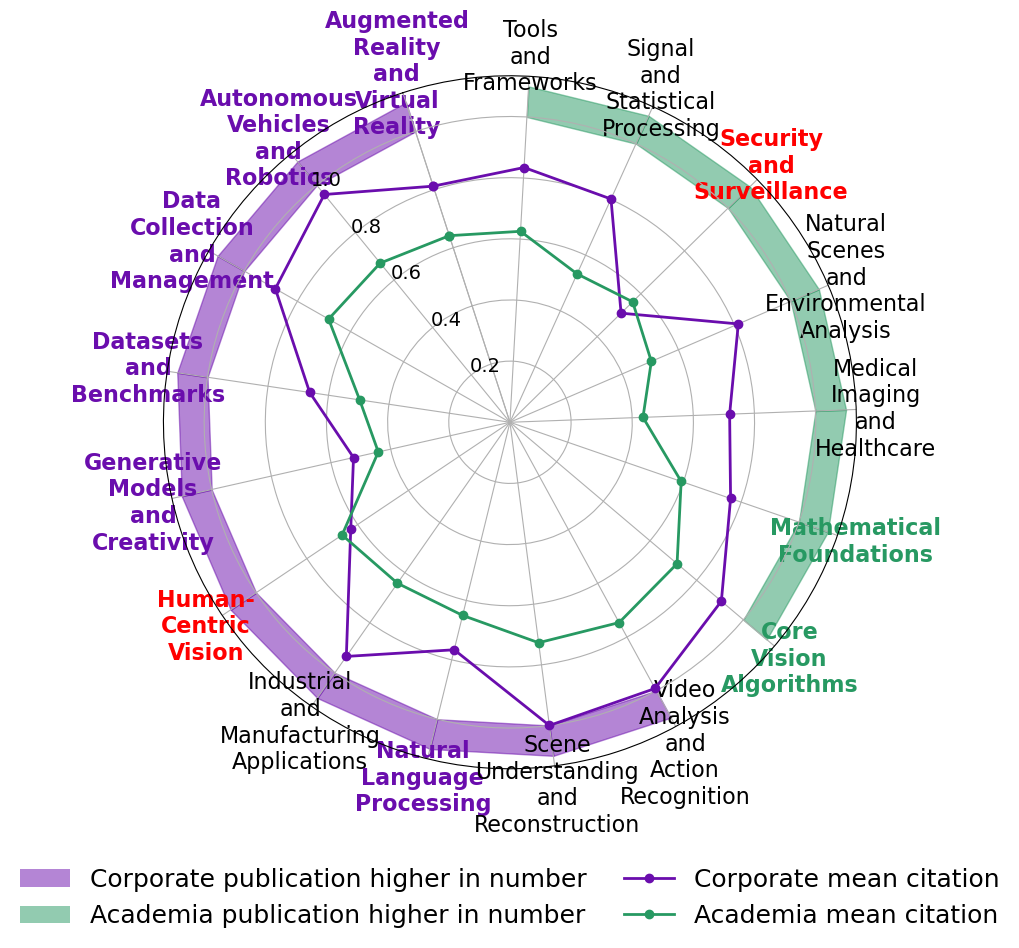

In [81]:
file_path = '../data/merged_dataset.csv'
output_file = '../data/results.csv'
keyword_file = '../data/keywords.txt'
extract_unique_keywords(file_path, keyword_file)
keyword_counts = process_csv(file_path)
write_results_to_csv(keyword_counts, output_file)

plot_radar_citations(keyword_counts)

Comparing the research focus of corporate and academic institutions. The shaded areas represent the number of paper contributions (corporate in purple, academia in green), while the lines indicate mean citation counts (corporate in purple, academia in green), normalized such that 1.0 corresponds to 70 citations. Corporate research dominates high-impact applied fields highlighted in purple in paper number. Academia leads in foundational fields highlighted in green in paper number. Notably, while corporate research generally receives more citations, academia remains influential in the fields highlighted in red.